# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

# Separación de la muestra, validación cruzada, selección de estadísticos de capacidad predictiva

-----

# IMPORTANTE: CAMBIAR NOMBRES TRAIN Y TEST PARA RESERVAS Y CANCELACIONES

# AutoARIMA

## Analisis Serie Reservas

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import numpy as np
import pandas as pd

#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

In [12]:
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-07-30,463
2017-08-06,452
2017-08-13,442
2017-08-20,465
2017-08-27,472


In [13]:
log_df_w_r = pd.read_csv('df_reservas_LOG.csv')
log_df_w_r = log_df_w_r.rename(columns={'Unnamed: 0': 'ArrivalDate'})
log_df_w_r['ArrivalDate'] = pd.to_datetime(log_df_w_r['ArrivalDate'])
log_df_w_r = log_df_w_r.set_index('ArrivalDate')
log_df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-07-30,6.137727
2017-08-06,6.113682
2017-08-13,6.091310
2017-08-20,6.142037
2017-08-27,6.156979


In [14]:
#Dividir el dataset

# Sktime fucntions
# Forecast horizon and Split function 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

105 4


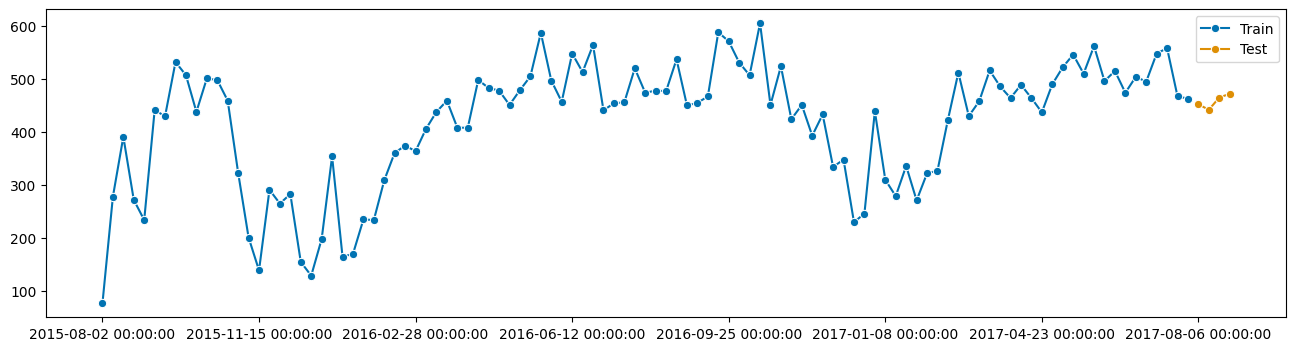

In [15]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w_r, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w_r, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [16]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [17]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [18]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=52, suppress_warnings=True)

In [19]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 52)   Log Likelihood                   6.887
Date:                             Thu, 21 Dec 2023   AIC                             -1.775
Time:                                     10:31:13   BIC                             14.092
Sample:                                 08-02-2015   HQIC                             4.653
                                      - 07-30-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6229      0.033     18.628      0.000       0.557       0.688
ar.L2         -0.9597      

In [20]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

,IsCanceled
2017-08-06,6.196023
2017-08-13,6.224798
2017-08-20,6.222042
2017-08-27,6.123048


In [21]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

,IsCanceled
2017-08-06,490.793158
2017-08-13,505.120748
2017-08-20,503.730696
2017-08-27,456.253064


## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [22]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [23]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

0.01347985858970691

In [24]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mape_arima_r = mean_absolute_percentage_error(y_test, np.exp(log_y_pred))
mape_arima_r

0.0863216658764004

In [25]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.08965344117621332

In [26]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

42.5357811616785

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

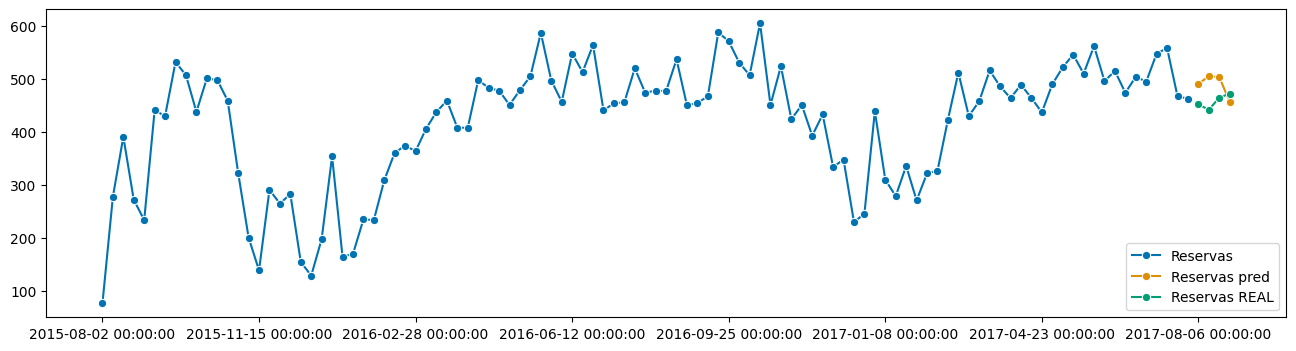

In [27]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Reservas", "Reservas pred", "Reservas REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

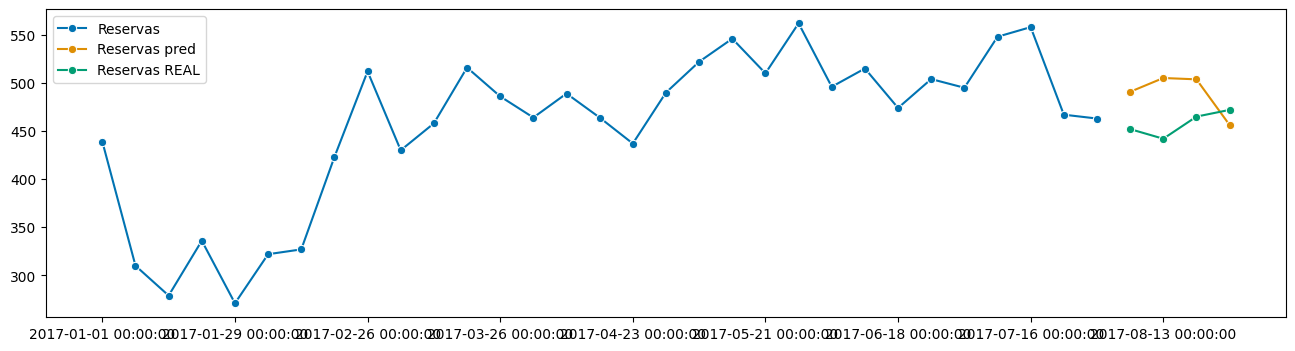

In [28]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Reservas", "Reservas pred", "Reservas REAL"])

---------

## Analisis Serie Cancelaciones

In [29]:
df_w_c = pd.read_csv('df_cancelaciones.csv')
df_w_c['ArrivalDate'] = pd.to_datetime(df_w_c['ArrivalDate'])
df_w_c = df_w_c.set_index('ArrivalDate')
df_w_c.head()

,IsCanceled
ArrivalDate,
2015-08-02,155
2015-08-09,310
2015-08-16,431
2015-08-23,188
2015-08-30,255


In [30]:
log_df_w_c = pd.read_csv('df_cancelaciones_LOG.csv')
log_df_w_c = log_df_w_c.rename(columns={'Unnamed: 0': 'ArrivalDate'})
log_df_w_c['ArrivalDate'] = pd.to_datetime(log_df_w_c['ArrivalDate'])
log_df_w_c = log_df_w_c.set_index('ArrivalDate')
log_df_w_c.head()

,IsCanceled
ArrivalDate,
2015-08-02,5.043425
2015-08-09,5.736572
2015-08-16,6.066108
2015-08-23,5.236442
2015-08-30,5.541264


105 4


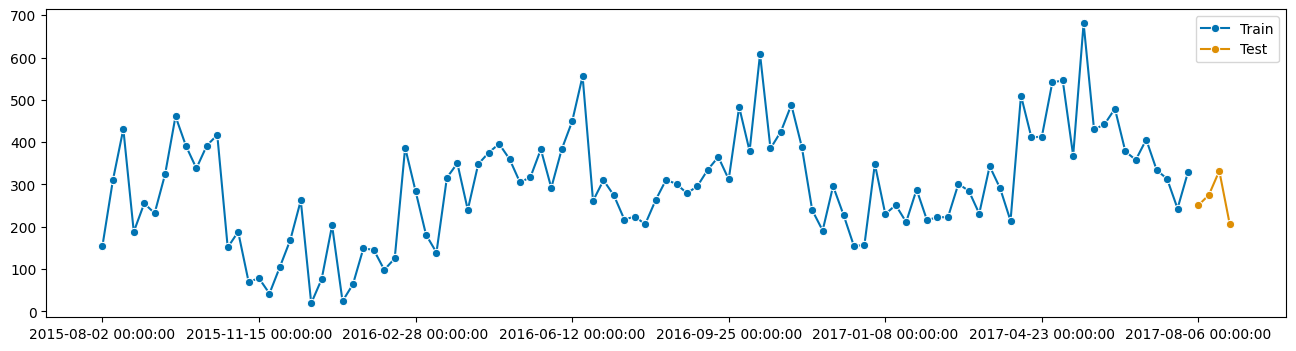

In [31]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w_c, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w_c, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [32]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [34]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=52, suppress_warnings=True)

In [35]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                 -66.143
Date:                            Thu, 21 Dec 2023   AIC                            138.285
Time:                                    10:33:53   BIC                            146.219
Sample:                                08-02-2015   HQIC                           141.499
                                     - 07-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6011      0.068     -8.903      0.000      -0.733      -0.469
ma.S.L52       0.3386      0.205   

In [36]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

,IsCanceled
2017-08-06,5.741075
2017-08-13,5.763677
2017-08-20,5.837068
2017-08-27,5.780688


In [37]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

,IsCanceled
2017-08-06,311.399074
2017-08-13,318.517247
2017-08-20,342.772733
2017-08-27,323.982141


## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [38]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [39]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)


0.03891707217941062

In [40]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mape_arima_c = mean_absolute_percentage_error(y_test, np.exp(log_y_pred))
mape_arima_c

0.25101378246803335

In [41]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.2617884824398646

In [42]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

69.96005361906731

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

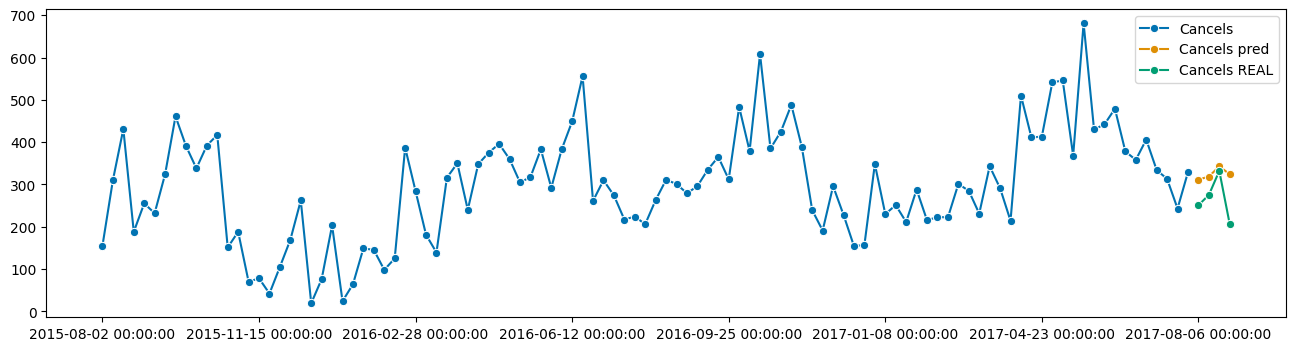

In [43]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

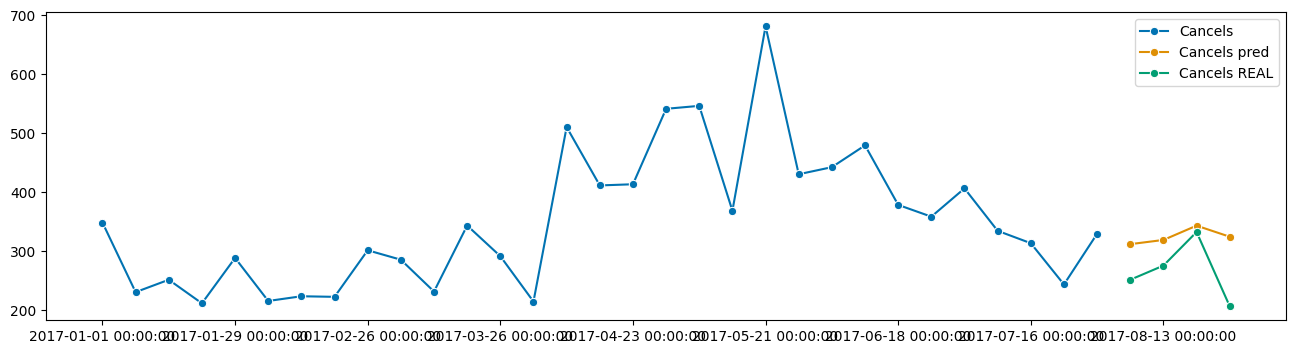

In [44]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

In [45]:
mape_reservas = pd.DataFrame()
mape_reservas['Modelo_Reservas'] = ['ARIMA']
mape_reservas['MAPE'] = [mape_arima_r]
mape_reservas

,Modelo_Reservas,MAPE
0,ARIMA,0.086322


In [46]:
mape_cancelaciones = pd.DataFrame()
mape_cancelaciones['Modelo_Cancelaciones'] = ['ARIMA']
mape_cancelaciones['MAPE'] = [mape_arima_c]
mape_cancelaciones

,Modelo_Cancelaciones,MAPE
0,ARIMA,0.251014


In [47]:
mape_reservas.to_csv('mape_reservas.csv')

In [48]:
mape_cancelaciones.to_csv('mape_cancelaciones.csv')

------